In [47]:
from collections import defaultdict
import re
import networkx as nx

rx = re.compile(r'\w+')
input_file = "input_files/day_25.txt"

with open(input_file) as lines:
    data = lines.read().splitlines()
    G = defaultdict(list)

    for line in data:
        k, *rest = rx.findall(line)
        G[k].extend(rest)
        for n in rest:
            G[n].append(k)


### It's Xmas Eve, let's let Networkx do the heavy lifting here:
looks like the edges we want are connected to nodes: hvm, pmn, jmn

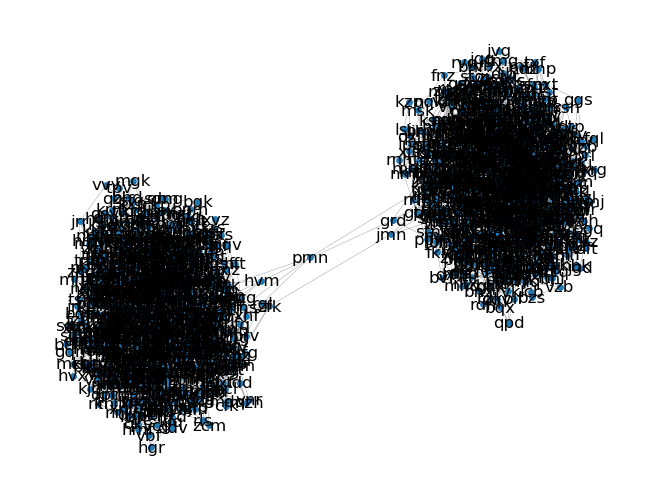

In [52]:
gg = nx.Graph(G)
nx.draw(gg, with_labels=True, node_size=15, width=.125)


In [40]:
# find them
bridges = sorted(nx.local_bridges(gg), key=lambda t: t[2], reverse=True)[:5]
bridges

[('zfk', 'jmn', 11),
 ('pmn', 'kdc', 10),
 ('grd', 'hvm', 10),
 ('rcf', 'bgn', 8),
 ('fhm', 'qnz', 7)]

In [43]:
# delete them
for n1, n2, conn in bridges[:3]:
    gg.remove_edge(n1, n2)

In [44]:
nx.number_connected_components(gg)

2

In [45]:
# get the size
for c in nx.connected_components(gg):
    print(len(c))

771
795


In [46]:
# Go to bed.
    
771 * 795

612945